# Plotting with Matplotlib

## DataFrame 1: IBM Employees

| Columns                  | Description                                             |
|--------------------------|---------------------------------------------------------|
| Age                      | Age                                                     |
| Attrition                | Indicates if employee left the company or not           |
| BusinessTravel           | Business travel frequency                               |
| DailyRate                | Employee cost per day                                   |
| Department               | Department                                              |
| DistanceFromHome         | Distance from employee's home to the company            |
| Education                | Education degree                                        |
| EducationField           | Education field                                         |
| EmployeeNumber           | Employee ID                                             |
| Gender                   | Gender                                                  |
| EnvironmentSatisfaction  | Satisfaction with the working environment               |
| HourlyRate               | Employee earnings per hour                              |
| JobInvolvement           | Emotionally satisfaction with the working environment   |
| JobLevel                 | Employee level                                          |
| JobRole                  | Employee role                                           |
| JobSatisfaction          | Job satisfaction                                        |
| MaritalStatus            | Marital Status                                          |
| NumCompaniesWorked       | Number of companies the employee worked before          |
| PercentSalaryHike        | Salary increasing (percent)                             |
| PerformanceRating        | Employee performance rating                             |
| RelationshipSatisfaction | Working relationships satisfaction level                |
| TotalWorkingYears        | Total working years of the employee                     |
| TrainingTimesLastYear    | Number of training the employee attended last year      |
| WorkLifeBalance          | Work life balance satisfaction in employee's view       |
| YearsAtCompany           | Total working years of the employee in the company      |
| YearsInCurrentRole       | Total working years of the employee in the current role |
| YearsSinceLastPromotion  | Total working years since employee's last promotion     |
| YearsWithCurrManager     | Total working years with employee's current manager     |

## DataFrame 2: Sao Paulo State 2020 Covid Data

| Column        | Description                                    |
|---------------|------------------------------------------------|
| nome_munic    | City name                                      |
| codigo_ibge   | City code                                      |
| casos_novos   | New covid cases registered in the date         |
| obitos_novos: | Deaths caused by covid registered in the date  |
| nome_drs      | Regional Health Department (DRS) name          |
| cod_drs       | Regional Health Department (DRS) code          |
| pop           | City population (estimate)                     |
| pop60         | City population of 60+ years of age (estimate) |
| ano_mes       | Date on YYYY_MM format                         |




# Exercises

## Preparing the DataFrames

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
df1 = pd.read_csv('./data/IBM_Employees.csv')

In [3]:
df2 = pd.read_csv('./data/dados_covid_sp_20.csv')

## Exercise 1:

**Use df1**

Create a scatter plot of size (10,5), containing *YearsAtCompany* on X axis and *DailyRate* on Y axis. Set the title as "YearsAtCompany x DailyRate" on blue color and a different font.

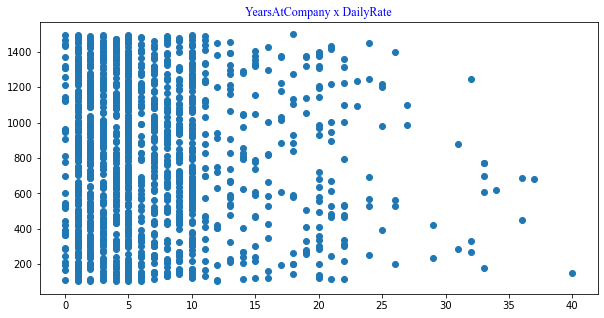

In [4]:
# Creating Figure
fig, ax = plt.subplots(figsize=(10,5))

# Defining Info 
title_info = {'family': 'Times New Roman',
              'color': 'blue'}

# Plotting the Ax
ax.scatter(x='YearsAtCompany', y='DailyRate', data=df1)

# Setting title
ax.set_title(label='YearsAtCompany x DailyRate', fontdict=title_info)

# Showing Plot 
plt.show()

Plot the previous plot again , identifying the genders by color (red for female and green for male). Set a legend for the colors.

Best supporting material I found:
- https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib
-https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html

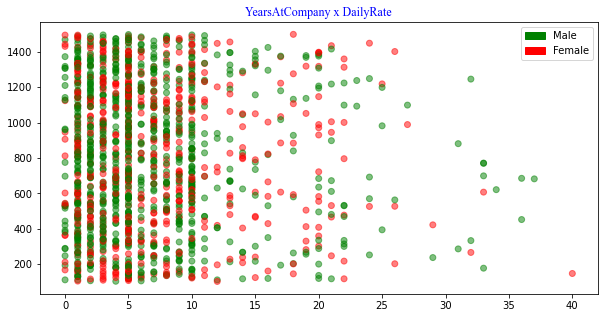

In [5]:
# Creating Figure
fig, ax = plt.subplots(figsize=(10,5))

# Defining Info 
title_info = {'family': 'Times New Roman',
              'color': 'blue'}

color_info = {'Male': 'green',
              'Female': 'red'}

# Plotting Ax
ax.scatter(x='YearsAtCompany', y='DailyRate', c=df1['Gender'].map(color_info), alpha=.5 , data=df1)

# Setting the Info
ax.set_title(label='YearsAtCompany x DailyRate', fontdict=title_info)

handles = [mpatches.Patch(label=label, color=color) for label, color in color_info.items()]
ax.legend(handles=handles)

# Showing the plot
plt.show()

Plot the previous chart again, identifying the employees by 'JobSatisfaction' variable, use the following colors:
- '#FFE4E1' for 1 - 'Low' 
- '#FFB6C1' for 2 - 'Medium' 
- '#FF69B4' for 3 - 'High' 
- '#C71585' for 4 - 'Very High' 

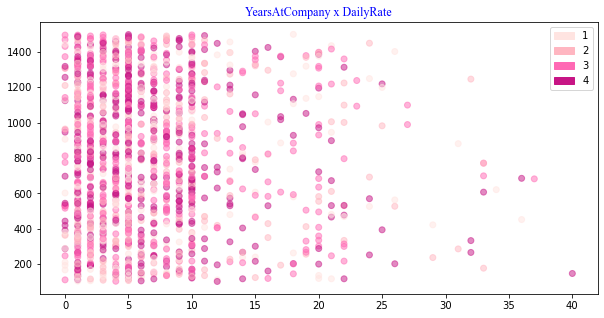

In [6]:
# Creating Figure
fig, ax = plt.subplots(figsize=(10,5))

# Defining Info 
title_info = {'family': 'Times New Roman',
              'color': 'blue'}

color_info = {1: '#FFE4E1',
              2: '#FFB6C1', 
              3: '#FF69B4',
              4: '#C71585'}

# Plotting Ax
ax.scatter(x='YearsAtCompany', y='DailyRate', c=df1['JobSatisfaction'].map(color_info), alpha=.5 , data=df1)

# Setting the Info
ax.set_title(label='YearsAtCompany x DailyRate', fontdict=title_info)

handles = [mpatches.Patch(label=label, color=color) for label, color in color_info.items()]
ax.legend(handles=handles)

# Showing the plot
plt.show()

## Exercise 2

**Use df2**

Create a line plot showing the new cases progress per month for 'Grande São Paulo', 'São José do Rio Preto' e 'Marília' DRSs. Identify each DRS by color and legend.

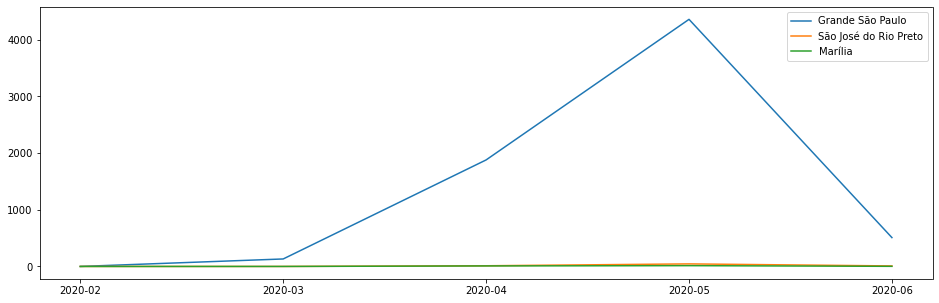

In [7]:
# Defining the filter
chosen_drs_group = ('Grande São Paulo', 'São José do Rio Preto', 'Marília')

# Creating a copy of df2, which will be used for plotting
df2_for_plotting = df2.copy()

# Categorizing date information
df2_for_plotting['ano_mes'] = pd.Categorical(values=df2_for_plotting['ano_mes'], 
                                categories=('2020-02', '2020-03', '2020-04', '2020-05', '2020-06'), 
                                ordered=True)

# Setting filter and grouping
df2_for_plotting = df2[df2['nome_drs'].isin(chosen_drs_group)]
df2_for_plotting = df2_for_plotting.groupby(['ano_mes', 'nome_drs'], as_index=False).sum()

# Creating figure
fig, ax = plt.subplots(figsize=(16,5))

# Plotting axes
for drs in chosen_drs_group:
    ax.plot('ano_mes', 'obitos_novos', label=drs, data=df2_for_plotting[df2_for_plotting['nome_drs'] == drs])

# Setting legend
ax.legend()

# Showing the plot
plt.show()

**Extra:**

If one wishes to add the **value labels** to a Line (Plot) Chart, seems like the best way to do it is using ax.annotate().

In this case, the "# Plotting axes" part of the code could be changed to:

```python

# Plotting axes and value labels
for index, drs in enumerate(chosen_drs_group):
    ax.plot('ano_mes', 'obitos_novos', label=drs, data=df2_grouped[df2_grouped['nome_drs'] == drs])
    for x_value, y_value in zip(ax.lines[index].get_xdata(), ax.lines[index].get_ydata()):
        ax.annotate(text=y_value, # Label itself
                    xy=(x_value, y_value), # Place label at (x,y) coordinate
                    xytext=(0, 10), # Vertically shift the label by 10 points
                    textcoords="offset points", # Interpret `xytext` as offset in points
                    ha='center', # Horizontally center label
                    va='top') # Vertically allign label to the top

        
```

Best support material I found was in the following links:
- https://matplotlib.org/stable/gallery/lines_bars_and_markers/timeline.html#sphx-glr-gallery-lines-bars-and-markers-timeline-py.
- https://stackoverflow.com/questions/59143306/add-label-values-to-bar-chart-and-line-chart-in-matplotlib.
- https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart.

Change the color for each DRS.

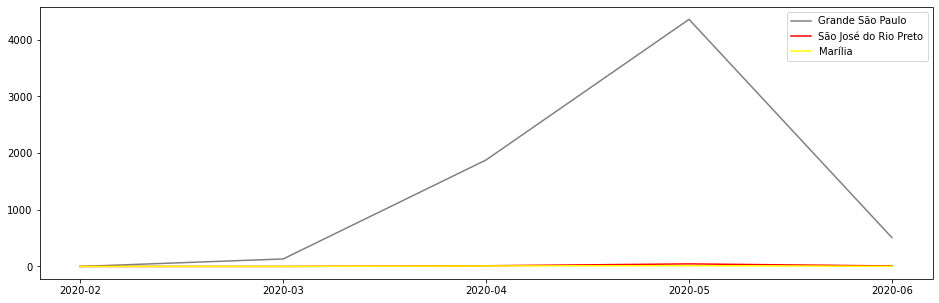

In [8]:
# Defining the filter for "DRS" and "Colors"
chosen_drs_group = ('Grande São Paulo', 'São José do Rio Preto', 'Marília')
chosen_colors = ('grey', 'red', 'yellow')
color_info = dict(zip(chosen_drs_group, chosen_colors))

# Creating figure
fig, ax = plt.subplots(figsize=(16,5))

# Plotting axes
for drs in chosen_drs_group:
    ax.plot('ano_mes', 'obitos_novos', label=drs, data=df2_for_plotting[df2_for_plotting['nome_drs'] == drs],
            color = color_info[drs])

# Setting legend
ax.legend()

# Showing the plot
plt.show()

Considering only the DRSs 'Bauru', 'São José do Rio Preto' e 'Marília', create three pie plots for April, May, and June months showing the percentage of new deats for each DRS.

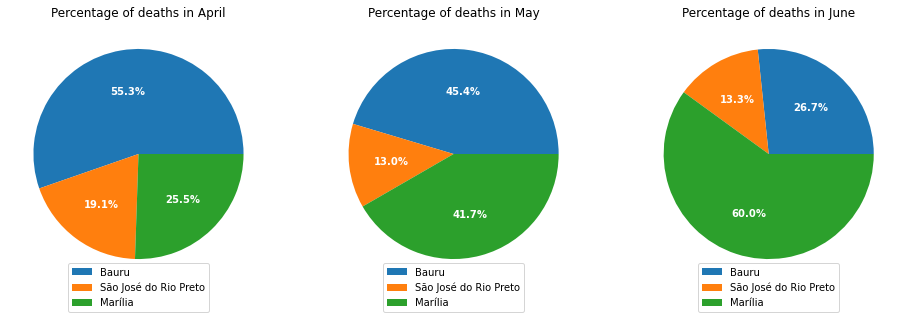

In [9]:
# Defining the filter
chosen_drs_group = ('Bauru', 'São José do Rio Preto', 'Marília')
chosen_months = ('2020-04', '2020-05', '2020-06')
month_labels = ('April', 'May', 'June')
month_info = dict(zip(chosen_months, month_labels))

# Creating a copy of df2, which will be used for plotting
df2_for_plotting = df2.copy()

# Categorizing date information
df2_for_plotting['ano_mes'] = pd.Categorical(values=df2_for_plotting['ano_mes'], 
                                categories=('2020-02', '2020-03', '2020-04', '2020-05', '2020-06'), 
                                ordered=True)

# Setting filter and grouping
df2_for_plotting = df2[df2['nome_drs'].isin(chosen_drs_group)]
df2_for_plotting = df2_for_plotting.groupby(['ano_mes', 'nome_drs'], as_index=False).sum()

# Creating figure and axes
fig, ax = plt.subplots(nrows=1, ncols=len(chosen_months), figsize=(16,5))

# Plotting axes and setting legends and texts
for index, month in enumerate(chosen_months):
    wedges, texts, autotexts = ax[index].pie(x='obitos_novos',
                                             autopct='%.1f%%',
                                             data=df2_for_plotting[df2_for_plotting['ano_mes'] == month])
    
    ax[index].legend(handles=wedges, 
                     labels=chosen_drs_group,
                     loc='lower center',
                     bbox_to_anchor=(0.5, -.12))
    
    plt.setp(obj=autotexts, size=10, weight="bold", color='white')
    
    ax[index].set_title(f'Percentage of deaths in {month_info[month]}')
        
# Showing the plot
plt.show()

**Extra:**

One could define a single legend for all the axes by changing the part of "# Plotting axes and texts" to:

```python

# Plotting axes and texts
for index, month in enumerate(chosen_months):
    wedges, texts, autotexts = ax[index].pie(x='obitos_novos',
                                             autopct='%.1f%%',
                                             data=df2_for_plotting[df2_for_plotting['ano_mes'] == month])
    
    plt.setp(obj= autotexts, size=10, weight="bold", color='white')
    
    ax[index].set_title(f'Percentage of deaths in {month_info[month]}')

# Setting legend for figure
fig.legend(handles=wedges, 
           labels=chosen_drs_group,
           loc='center left')

```


## Exercise 3:

**Use df2**

Create a bar plot presenting the total of deaths (considering every month) for all DRSs, excluding 'Grande São Paulo'. Set a title for the plot and axis labels, an appropriate figure size and intersperce the bars with red and green colors.

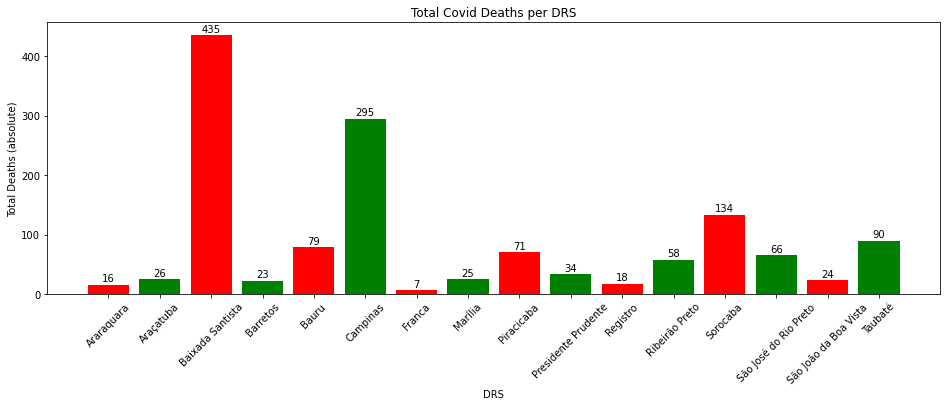

In [10]:
# Defining the filter
excluded_drs = 'Grande São Paulo'

# Creating a copy of df2, which will be used for plotting
df2_for_plotting = df2.copy()

# Categorizing date information
df2_for_plotting['ano_mes'] = pd.Categorical(values=df2_for_plotting['ano_mes'], 
                                categories=('2020-02', '2020-03', '2020-04', '2020-05', '2020-06'), 
                                ordered=True)

# Setting filter and grouping
df2_for_plotting = df2[~(df2['nome_drs'] == excluded_drs)]
df2_for_plotting = df2_for_plotting.groupby('nome_drs', as_index=False).sum()

# Creating figure
fig, ax = plt.subplots(figsize=(16,5))

# Plotting axis
vbars = ax.bar(x='nome_drs', height='obitos_novos', color=('red', 'green'), data=df2_for_plotting)

# Setting value labels
ax.bar_label(container=vbars, padding=1) # Only for matplotlib version higher than 3.4.0

# Setting axis characteristics
ax.set_ylabel('Total Deaths (absolute)')
ax.set_xlabel('DRS')
ax.set_title('Total Covid Deaths per DRS')
ax.tick_params(axis='x', labelrotation=45)

# Showing the plot
plt.show()

Best support material I found was in the following links:
- https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib.
- https://www.delftstack.com/pt/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/.
- https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart.
- https://datavizpyr.com/annotate-barplot-with-bar_label-in-matplotlib/.
- https://matplotlib.org/3.3.0/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py.

Create a horizontal bar plot presenting the total deaths in April for 3 DRSs of your choice. Set a title for the figure and axis and an appropriate figure size.

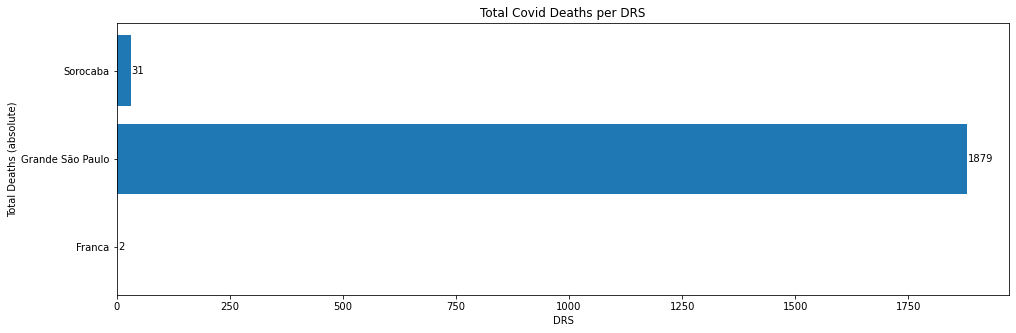

In [15]:
# Defining the filter
chosen_drs_group = ('Grande São Paulo', 'Franca', 'Sorocaba')
chosen_month = '2020-04'

# Setting filter and grouping
df2_for_plotting = df2[(df2['nome_drs'].isin(chosen_drs_group)) & (df2['ano_mes'] == chosen_month)]
df2_for_plotting = df2_for_plotting.groupby('nome_drs', as_index=False).sum()

# Creating figure
fig, ax = plt.subplots(figsize=(16,5))

# Plotting axis
hbar = ax.barh(y='nome_drs', width='obitos_novos', data=df2_for_plotting)

# Setting value labels
ax.bar_label(container=hbar, padding=1) # Only for matplotlib version higher than 3.4.0

# Setting axis characteristics
ax.set_ylabel('Total Deaths (absolute)')
ax.set_xlabel('DRS')
ax.set_title('Total Covid Deaths per DRS')

# Showing the plot
plt.show()

## Exercise 4

**Use df1**

Create a Histogram for employees age, dividing it by gender.

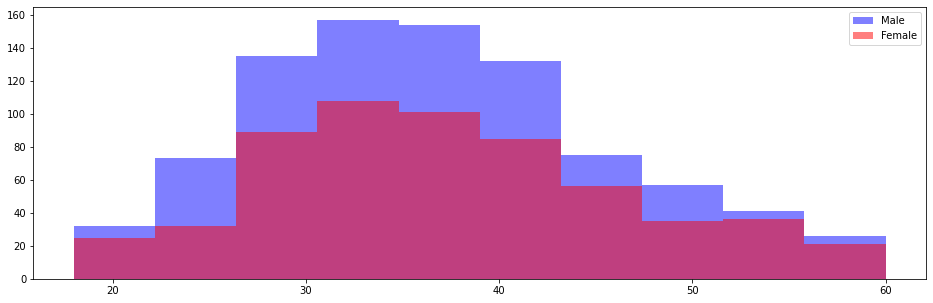

In [16]:
# Defining the colors
genders = ('Male', 'Female')
chosen_colors = ('blue', 'red')
color_info = dict(zip(genders, chosen_colors))

# Creating figure
fig, ax = plt.subplots(figsize=(16,5))

# Plotting axis
for gender in genders:
    ax.hist(x='Age', alpha=0.5, color=color_info[gender], label=gender, data= df1[df1['Gender'] == gender])
    
# Setting legend
ax.legend()

# Showing the plot
plt.show()

Create a boxplot for employees age by gender.

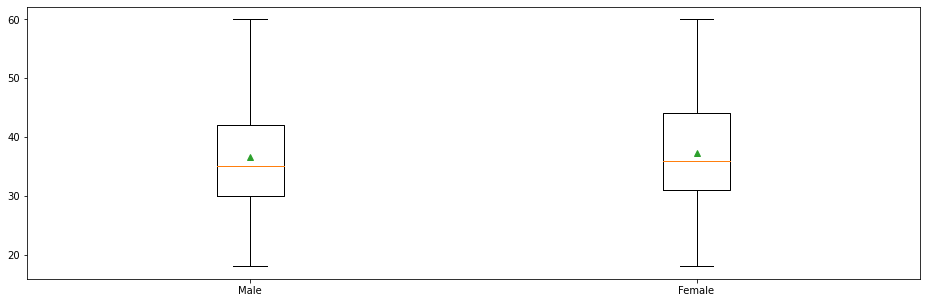

In [17]:
# Defining the colors
genders = ('Male', 'Female')
chosen_colors = ('blue', 'red')
color_info = dict(zip(genders, chosen_colors))
positions = 0

# Creating figure
fig, ax = plt.subplots(figsize=(16,5))

# Plotting ax
ax.boxplot(x=[df1[df1['Gender'] == gender]['Age'] for gender in genders], showmeans=True, labels=genders)
    
# Showing the plot
plt.show()